## Importation de l'ensemble de données

In [1]:
import pandas

Cet ensemble de données fournit des données météorologiques historiques pour Alger, couvrant la période de janvier 2002 à août 2023. Les données comprennent une variété de variables liées à la météo pour aider les chercheurs, les analystes et les passionnés de météo à explorer et analyser les tendances et les conditions climatiques à Alger au fil des ans.

Le tableau fournit une brève description des caractéristiques de l'ensemble de données :




| N°  | Feature                         | Feature Unite                   | Feature description                                                                                   |
|-----|---------------------------------|---------------------------------|-------------------------------------------------------------------------------------------------------|
| 1   | time                            | Date                            | /                                                                                                     |
| 2   | Weather Code                    | (wmo code)                      | The most severe weather condition on a given day                                                      |
| 3   | Maximum Temperature             | °C (°F)                         | Maximum and minimum daily air temperature at 2 meters above ground                                    |
| 4   | Minimum Temperature             | °C (°F)                         |                                                                                                       |
| 5   | Mean Temperature                | °C (°F)                         |                                                                                                       |
| 6   | Maximum Apparent Temperature    | °C (°F)                         | Maximum and minimum daily apparent temperature                                                        |
| 7   | Minimum Apparent Temperature    | °C (°F)                         |                                                                                                       |
| 8   | Mean Apparent Temperature       | °C (°F)                         |                                                                                                       |
| 9   | Sunrise                         | Date                            | /                                                                                                     |
| 10  | Sunset                          | Date                            | /                                                                                                     |
| 11  | Precipitation Sum               | mm (inch)                       | Sum of daily precipitation (including rain, showers and snowfall)                                     |
| 12  | Rain Sum                        | mm (inch)                       | Rain from large scale weather systems of the preceding hour in millimeter                             |
| 13  | Snowfall Sum                    | cm (inch)                       | Sum of daily snowfall                                                                                 |
| 14  | Precipitation Hours             | cm (inch)                       | Total precipitation (rain, showers, snow) sum of the preceding hour                                   |
| 15  | Maximum Wind Speed (10 m)       | km/h (mph, m/s, knots)          | /                                                                                                     |
| 16  | Maximum Wind Gusts (10 m)       | °                                | /                                                                                                     |
| 17  | Dominant Wind Direction         | °                                | Dominant wind direction                                                                               |
| 18  | Shortwave Radiation Sum         | W/m²                            | as average of the preceding hour. This is equal to the total global horizontal irradiation             |
| 19  | Reference Evapotranspiration (ET₀) | mm (inch)                     | ET₀ Reference Evapotranspiration of a well-watered grass field                                        |


In [3]:
dataset_path = "Algiers_Weather_Data.csv"
df = pandas.read_csv(dataset_path)

In [4]:
df.head()

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2002-01-01,3,15.4,10.5,12.2,11.9,7.5,9.2,2002-01-01T09:00,2002-01-01T18:42,0.0,0.0,0.0,0,25.2,41.8,76,6.89,1.27
1,2002-01-02,51,16.2,9.8,12.2,14.1,6.7,9.4,2002-01-02T09:00,2002-01-02T18:42,0.6,0.6,0.0,2,19.1,34.6,128,6.93,1.65
2,2002-01-03,51,17.2,8.4,12.0,15.1,5.2,9.9,2002-01-03T09:00,2002-01-03T18:43,0.1,0.1,0.0,1,13.7,24.1,203,10.43,1.87
3,2002-01-04,61,13.6,7.8,10.2,12.9,6.4,9.1,2002-01-04T09:00,2002-01-04T18:44,6.0,6.0,0.0,15,12.3,24.8,214,8.45,1.02
4,2002-01-05,51,13.8,7.9,10.6,11.7,5.9,8.4,2002-01-05T09:00,2002-01-05T18:45,0.3,0.3,0.0,3,17.1,31.0,83,7.05,1.18


## Préparation des données

Pour les prévisions à long terme (jusqu'à 1 ou 2 mois), il est nécessaire de prendre en considération toutes les caractéristiques.

In [5]:
time = df['time']
temperature_2m_max = df['temperature_2m_max (°C)']
temperature_2m_min = df['temperature_2m_min (°C)']
temperature_2m_mean = df['temperature_2m_mean (°C)']
apparent_temperature_max = df['apparent_temperature_max (°C)']
apparent_temperature_min = df['apparent_temperature_min (°C)']
apparent_temperature_mean = df['apparent_temperature_mean (°C)']
precipitation_sum = df['precipitation_sum (mm)']
rain_sum = df['rain_sum (mm)']
snowfall_sum = df['snowfall_sum (cm)']
precipitation_hours = df['precipitation_hours (h)']
windspeed_10m_max = df['windspeed_10m_max (km/h)']
windgusts_10m_max = df['windgusts_10m_max (km/h)']
winddirection_10m_dominant = df['winddirection_10m_dominant (°)']
shortwave_radiation_sum = df['shortwave_radiation_sum (MJ/m²)']
et0_fao_evapotranspiration = df['et0_fao_evapotranspiration (mm)']

## Prétraitement des données

### Fonction de normalisation

Avant d'entraîner le réseau neuronal, nous réalisons une normalisation afin de restreindre les valeurs des caractéristiques à une plage de 0 à 1, car chaque caractéristique possède des valeurs avec des plage variables. Afin d'accomplir cela, nous multiplions l'écart type de chaque entité par sa moyenne avant de le calculer.


In [6]:
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

Ainsi, regroupons les caractéristiques choisies dans un seul tableau afin d'utiliser cette fonction de normalisation.


In [7]:
features = pandas.concat([temperature_2m_max, temperature_2m_min, temperature_2m_mean, apparent_temperature_max, apparent_temperature_min,apparent_temperature_mean,
                          precipitation_sum, rain_sum, snowfall_sum, precipitation_hours, windspeed_10m_max, windgusts_10m_max , winddirection_10m_dominant,
                          shortwave_radiation_sum, et0_fao_evapotranspiration ], axis=1)
features.index = time
features

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
time,,,,,,,,,,,,,,,
2002-01-01,15.4,10.5,12.2,11.9,7.5,9.2,0.0,0.0,0.0,0,25.2,41.8,76,6.89,1.27
2002-01-02,16.2,9.8,12.2,14.1,6.7,9.4,0.6,0.6,0.0,2,19.1,34.6,128,6.93,1.65
2002-01-03,17.2,8.4,12.0,15.1,5.2,9.9,0.1,0.1,0.0,1,13.7,24.1,203,10.43,1.87
2002-01-04,13.6,7.8,10.2,12.9,6.4,9.1,6.0,6.0,0.0,15,12.3,24.8,214,8.45,1.02
2002-01-05,13.8,7.9,10.6,11.7,5.9,8.4,0.3,0.3,0.0,3,17.1,31.0,83,7.05,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,34.5,22.8,26.1,34.2,21.9,27.1,0.1,0.1,0.0,1,40.8,74.9,282,16.13,4.72
2023-08-28,28.0,22.2,24.4,27.8,20.4,23.6,0.0,0.0,0.0,0,20.5,37.8,290,22.47,5.98
2023-08-29,30.0,19.7,24.6,29.0,18.9,24.3,0.0,0.0,0.0,0,19.5,36.4,259,23.95,6.04


In [8]:
features = normalize(features.values)
features = pandas.DataFrame(features)
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.054587,-0.552835,-0.931696,-1.191543,-0.702972,-1.020076,-0.365405,-0.365388,-0.021043,-0.509414,0.852450,0.329889,-0.889047,-1.546964,-1.350371
1,-0.938813,-0.680836,-0.931696,-0.937374,-0.813564,-0.994276,-0.232107,-0.231944,-0.021043,-0.131449,0.004207,-0.222898,-0.382031,-1.541506,-1.141268
2,-0.794096,-0.936837,-0.964590,-0.821843,-1.020926,-0.929775,-0.343189,-0.343147,-0.021043,-0.320432,-0.746697,-1.029045,0.349243,-1.063936,-1.020209
3,-1.315078,-1.046553,-1.260633,-1.076011,-0.855037,-1.032976,0.967572,0.969055,-0.021043,2.325322,-0.941376,-0.975302,0.456497,-1.334104,-1.487938
4,-1.286134,-1.028267,-1.194846,-1.214649,-0.924157,-1.123277,-0.298756,-0.298666,-0.021043,0.057533,-0.273906,-0.499291,-0.820795,-1.525132,-1.399895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,1.709512,1.696326,1.354415,1.384801,1.287696,1.289038,-0.343189,-0.343147,-0.021043,-0.320432,3.021729,2.871173,1.119519,-0.286180,0.548060
7909,0.768850,1.586610,1.074819,0.645402,1.080334,0.837535,-0.365405,-0.365388,-0.021043,-0.509414,0.198886,0.022785,1.197521,0.578903,1.241400
7910,1.058285,1.129464,1.107712,0.784039,0.872973,0.927835,-0.365405,-0.365388,-0.021043,-0.509414,0.059830,-0.084701,0.895261,0.780846,1.274416
7911,1.087228,0.818605,1.074819,1.015101,0.997390,1.082636,-0.365405,-0.365388,-0.021043,-0.509414,-0.120944,0.214725,-1.142556,0.749463,0.960762


### Déclaration des données d'entraînement de de validation

Par la suite, nous répartirons l'ensemble des données en deux parties : l'entraînement et la validation, en consacrant 80 % de l'ensemble des données à entrainer.

In [9]:
training_size = int ( 0.8 * features.shape[0])
train_data = features.loc[0 : training_size - 1]
val_data = features.loc[training_size:]

Les données de suivi des 60 derniers jours seront utilisées pour chaque prédiction, ce qui équivaut à environ 60 horodatages.
Ces informations serviront à anticiper la température après 1 jour à l'avenir.

In [10]:
start = 60 + 1
end = start + training_size

x_train = train_data.values
y_train = features.iloc[start:end][[0]]

sequence_length = 60

## Dataset d'entraînement

Par la suite, créons la forme finale de l'ensemble de données d'entraînement en utilisant la bibliothèque de prétraitement Keras.


In [11]:
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=sequence_length,
    batch_size=64,
)

## Dataset de validation

De la même manière, nous construirons l’ensemble de validation. Cependant, les 61 dernières (60 + 1) lignes doivent être exclues des données car nous n'aurons pas d'informations d'étiquette pour ces entrées. Retirons les 61 lignes de la fin des données. En outre, l'ensemble de données d'étiquette de validation doit commencer à la position 61 après la position de division d'entraînement.

In [12]:
x_val_end = len(val_data) - start

label_start = training_size + start

x_val = val_data.iloc[:x_val_end][[i for i in range(15)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    batch_size=64,
)

## entraînement du modèle

Tout d’abord, extrayons un seul lot de l’ensemble de données d'entrainement et utilisons-le pour avoir la dimension des couches d’entrée et de sortie. Ensuite, nous utiliserons la bibliothèque de couches Keras pour créer une couche LSTM avec 32 unités mémoire.

In [13]:
for batch in dataset_train.take(1):
    inputs, targets = batch

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "Weather_forcaster"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 15)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                6144      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 6177 (24.13 KB)
Trainable params: 6177 (24.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ensuite, nous ajustons le modèle en utilisant les ensembles de données d'entraînement/validation et un numéro d'époque de 15 (déterminé expérimentalement pour notre ensemble de données).

In [14]:
history = model.fit(
    dataset_train,
    epochs=15,
    batch_size=50,
    validation_data=dataset_val
)

Epoch 1/15
98/98 [==============================] - 7s 51ms/step - loss: 0.2708 - val_loss: 0.1974
Epoch 2/15
98/98 [==============================] - 3s 33ms/step - loss: 0.1834 - val_loss: 0.1831
Epoch 3/15
98/98 [==============================] - 3s 35ms/step - loss: 0.1757 - val_loss: 0.1771
Epoch 4/15
98/98 [==============================] - 4s 45ms/step - loss: 0.1714 - val_loss: 0.1740
Epoch 5/15
98/98 [==============================] - 3s 33ms/step - loss: 0.1687 - val_loss: 0.1721
Epoch 6/15
98/98 [==============================] - 3s 32ms/step - loss: 0.1667 - val_loss: 0.1707
Epoch 7/15
98/98 [==============================] - 3s 32ms/step - loss: 0.1652 - val_loss: 0.1696
Epoch 8/15
98/98 [==============================] - 5s 46ms/step - loss: 0.1639 - val_loss: 0.1688
Epoch 9/15
98/98 [==============================] - 3s 32ms/step - loss: 0.1628 - val_loss: 0.1681
Epoch 10/15
98/98 [==============================] - 3s 32ms/step - loss: 0.1618 - val_loss: 0.1676
Epoch 11/

## Calcul des métriques de performance :

In [20]:
# Calcul des métriques de performance RMSE et MAE
for batch in dataset_val.take(1):
    inputs, targets = batch
    predictions = model.predict(inputs)
    rmse = keras.metrics.RootMeanSquaredError()
    mae = keras.metrics.MeanAbsoluteError()
    rmse.update_state(targets, predictions)
    mae.update_state(targets, predictions)
    print(f"RMSE: {rmse.result().numpy():.2f}")
    print(f"MAE: {mae.result().numpy():.2f}")

2/2 [==============================] - 0s 11ms/step
RMSE: 0.36
MAE: 0.28


In [17]:
from matplotlib import pyplot as plt

Ensuite, nous montrons ci-dessous les résultats de l’ajustement du modèle en termes de perte d’entraînement.

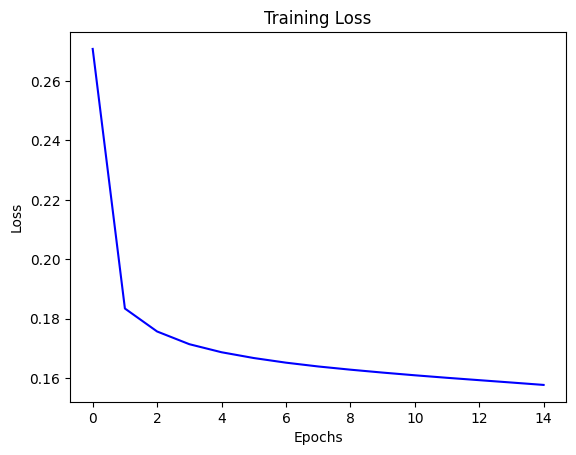

In [18]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Une fois que nous aurons reçu notre modèle entraîné, nous le mettrons en œuvre afin de prédire la température normalisée pour une valeur dans l'ensemble des données de calibrage. Par la suite, nous ajusterons cette valeur en utilisant l'écart type et la moyenne de la température, puis nous représenterons les résultats dans un graphique en utilisant Matplotlib.

2/2 [==============================] - 0s 10ms/step


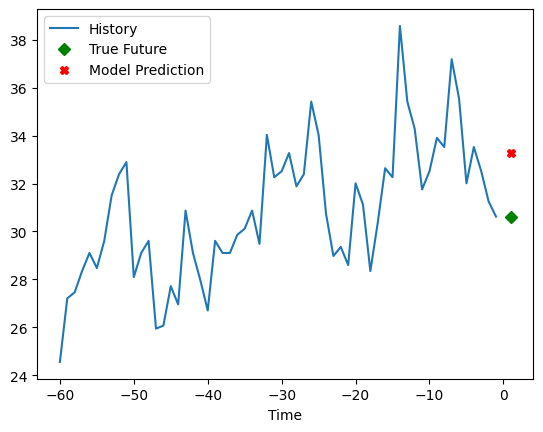

In [19]:
temp_mean = temperature_2m_max.mean(axis=0)
temp_std = temperature_2m_max.std(axis=0)

for x, y in dataset_val.skip(12):
    history_data = x[0][:, 1].numpy() * temp_std + temp_mean
    true_value = y[0].numpy() * temp_std + temp_mean
    prediction = model.predict(x)[0] * temp_std + temp_mean
    time_steps = list(range(-(history_data.shape[0]), 0))
    plt.plot(time_steps, history_data)
    plt.plot(1, true_value, "gD")
    plt.plot(1, prediction, "rX")
    plt.legend(["History", "True Future", "Model Prediction"])
    plt.xlabel("Time")
    plt.show()
    break

## Conclusion
Les réseaux de mémoire à long terme sont une forme de réseau neuronal récurrent capable de résoudre des problèmes liés à la prédiction de séquences. Les RNN et LSTM, notamment, se distinguent des autres réseaux neuronaux en intégrant une dimension temporelle et en prenant en considération le temps et la séquence. Nous avons utilisé cette sous-classe de réseau dans notre projet et l'avons employée pour élaborer un modèle de prévision météorologique. Son efficacité a été démontrée en tant que sous-groupe de RNN destinés à repérer des modèles dans des séquences de données, y compris des données de séries chronologiques numériques.